#### **Exercise 1:**

Last week, we started looking at the Titanic data.  Load that data again. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.  For those that seem important, use a `SimpleImputer` to impute the data.

<Axes: >

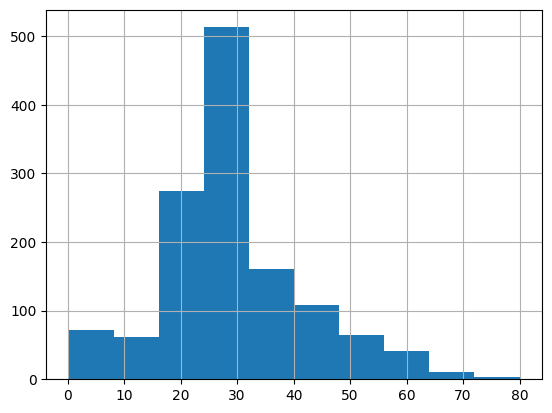

In [17]:
import pandas as pd
from sklearn.impute import SimpleImputer

df = pd.read_csv('data/titanic.csv')
df.isnull().sum()
df_clean = df.drop(columns= 'cabin', axis=1)

imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(df_clean[['age']])
df_clean['age']=X[:,0]
df_clean.age.hist()

<Axes: >

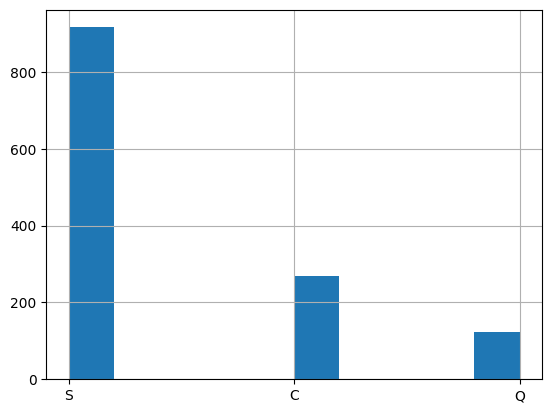

In [21]:
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(df_clean[['embarked']])
df_clean['embarked']=X[:,0]
df_clean.embarked.hist()

#### **Exercise 2**

Sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [22]:
from sklearn.preprocessing import OneHotEncoder

new_df = df_clean[['sex', 'age', 'sibsp', 'embarked', 'survived']]
ohe = OneHotEncoder(drop = 'first', sparce_outpue = False)
X=ohe.fit_transform(new_df)

<bound method DataFrame.info of       pclass                                             name     sex  \
0          1                    Allen, Miss. Elisabeth Walton  female   
1          1                   Allison, Master. Hudson Trevor    male   
2          1                     Allison, Miss. Helen Loraine  female   
3          1             Allison, Mr. Hudson Joshua Creighton    male   
4          1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   
...      ...                                              ...     ...   
1304       3                             Zabour, Miss. Hileni  female   
1305       3                            Zabour, Miss. Thamine  female   
1306       3                        Zakarian, Mr. Mapriededer    male   
1307       3                              Zakarian, Mr. Ortin    male   
1308       3                               Zimmerman, Mr. Leo    male   

          age  sibsp  parch  ticket      fare embarked  survived  
0     29.0000      0    

#### **Exercise 3**

Using 5-fold cross-validation, examine the performance of a LogisticRegression classifier. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression()
X = new_df.drop('survived', axis = 1)
y = new_df['survived']

result = cross_val_score(lr,X,y,cv=5)

#### **Exercise 4**

Replace the logistic regression classifier with a decision tree classifier.  Which works better?  Why do you think that is?

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = DecisionTreeClassifier()
X = new_df.drop('survived', axis = 1)
y = new_df['survived']

result = cross_val_score(lr,X,y,cv=5)

#### **Exercise 5:** 

See if you can get the decision tree classifier to perform better by adjusting your imputation procedure to use a KNNImputer.

#### **Exercise 6:**

Try using a `GridSearchCV` to optimize the DecisionTree algorithm.  What is the best performance you can achieve?